
## World surface heat flow data

Surface heat flow data are becoming widely available, providing us with valuable insight into the thermal structure of the Earth's lithosphere.

The International Heat Flow Commission (IHFC) gathers, quality checks, and publishes heat flow density data all over the planet (https://ihfc-iugg.org/). A set of heat flow data was downloaded from the IHFC website and can be found in ```files/IHFC_2023_GHFDB.csv```.

Below, we will read the heat flow data file, save it in a DataFrame, and test various ways to plot the data using the Cartoppy module.

> You can familiarize yourself with the cartopy library using the resource : https://scitools.org.uk/cartopy/docs/latest/.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

In [ ]:
!pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
# read heat flow (q) data using pandas
file_path = 'files/IHFC_2023_GHFDB.csv'
df_q = pd.read_csv(file_path, delimiter=',', header='infer')

df_q.head()

,lat,lng,q
0,1.8333,144.8833,10.0
1,24.8300,122.7000,10.0
2,-36.8333,55.2833,10.0
3,41.4000,40.6667,10.0
4,35.2167,32.9333,10.0


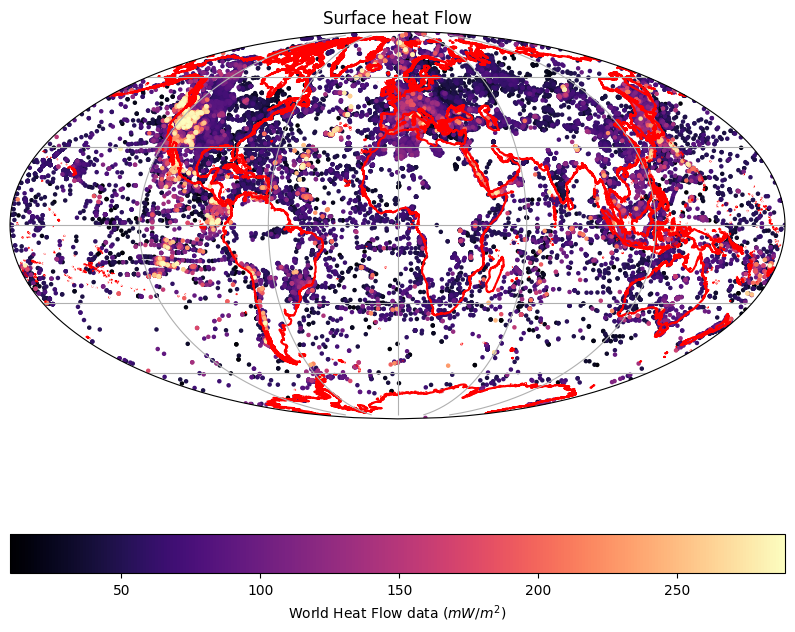

In [ ]:
# --------------------------------------------------
# Plot the world heat flow data using scatter plot
# --------------------------------------------------

# Create a figure and axis with a Mollweide projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Mollweide()})

# Plot the heat flow data using scatter plot
ax.scatter(df_q['lng'], df_q['lat'], c=df_q['q'], s=5,  cmap='magma', transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='red', linewidth=1.5)
ax.gridlines()

# Set the title and colorbar
ax.set_title('Surface heat Flow')
cbar = plt.colorbar(ax.get_children()[0], ax=ax, orientation='horizontal')

cbar.set_label('World Heat Flow data ($mW/m^2$)')

# Show the plot
plt.show()

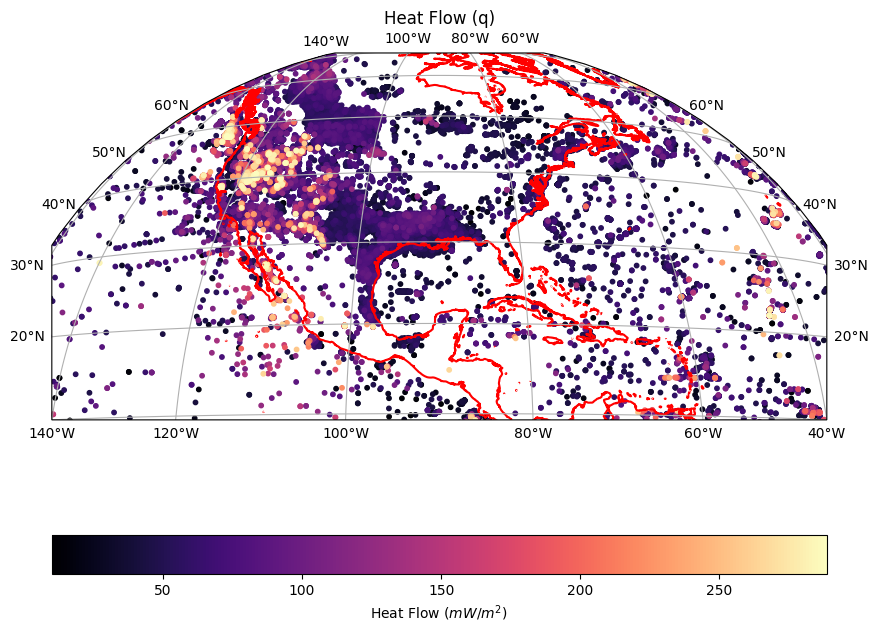

In [ ]:
# ------------------------------------------------------------------------
# Show heat flow data over North America using a Geostationary projection
# ------------------------------------------------------------------------

# Create a figure and axis with a Geostationary projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Geostationary(central_longitude=-90)})

# Plot the data using scatter plot
ax.scatter(df_q['lng'], df_q['lat'], c=df_q['q'], s=10,  cmap='magma', transform=ccrs.PlateCarree())

# Set the extent of the map
ax.set_extent([-140, -40, 10, 90], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='red', linewidth=1.5)
ax.gridlines(draw_labels=True)

# Set the title and colorbar
ax.set_title('Heat Flow (q)')
cbar = plt.colorbar(ax.get_children()[0], ax=ax, orientation='horizontal')

cbar.set_label('Heat Flow ($mW/m^2$)')

# Show the plot
plt.show()

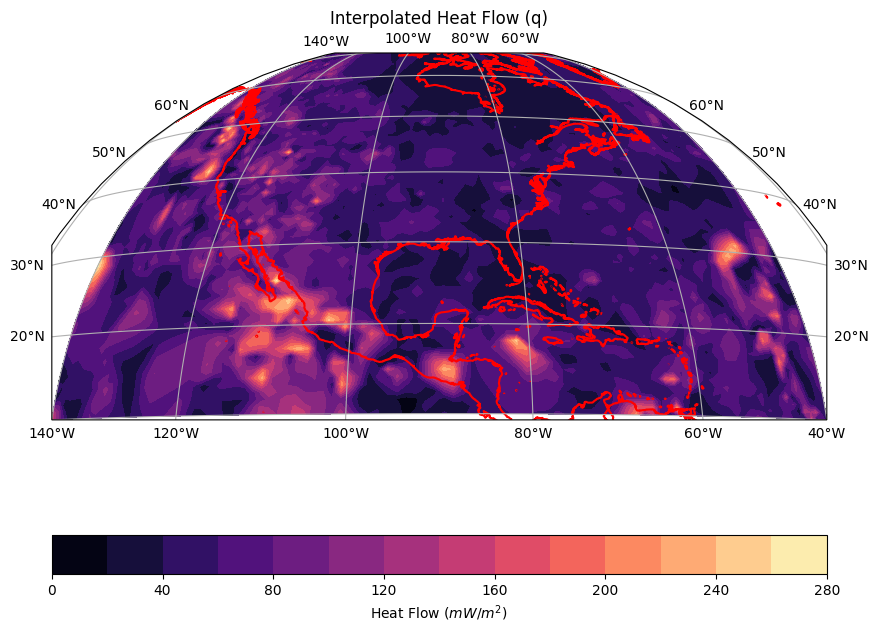

In [ ]:
# --------------------------------------------------------
# Interpolate the heat flow data over the selected region
# --------------------------------------------------------

# Create a grid of latitudes and longitudes
lat = np.linspace(10, 90, 100)
lon = np.linspace(-140, -40, 100)
lon, lat = np.meshgrid(lon, lat)

# Interpolate the heat flow data
q = griddata((df_q['lng'], df_q['lat']), df_q['q'], (lon, lat), method='linear')

# Plot the interpolated heat flow data
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Geostationary(central_longitude=-90)})
img = ax.contourf(lon, lat, q, cmap='magma', levels=15, transform=ccrs.PlateCarree())
ax.set_extent([-140, -40, 10, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='red', linewidth=1.5)
ax.gridlines(draw_labels=True)
ax.set_title('Interpolated Heat Flow (q)')
cbar = plt.colorbar(img, ax=ax, orientation='horizontal')
cbar.set_label('Heat Flow ($mW/m^2$)')
plt.show()

 &nbsp;<div style="text-align: right">   
    &rarr; <b>NEXT: [Compute geothermal gradient](./7_geothermal_gradient_computation.ipynb)</b> <a href=""></a> &nbsp;&nbsp;
<img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
    </div>